In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
# from math import sqrt, pi, exp
# import cv2
# import JPEGFUNC
from JPEGFUNC import *

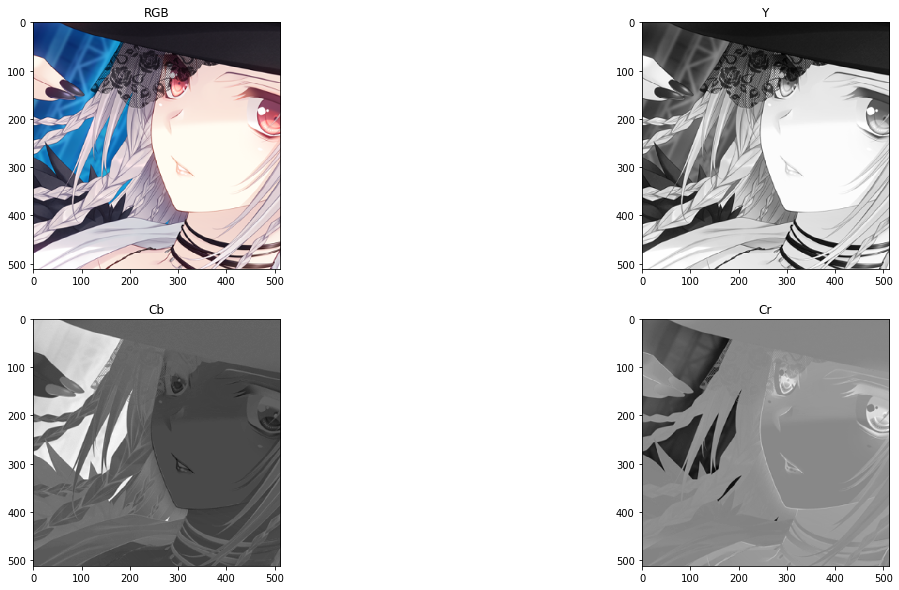

In [2]:
# Read img and transfer RGB to YCbCr
ori=Image.open("Saika.png")
arrayOri=np.array(ori)[:,:,:3]
arrayOri=arrayOri[200:200+512,600:600+512].copy()
cbcr=ycc(arrayOri)

fig=plt.figure(figsize=(20,10))
ax = fig.subplots(2, 2)

ax[0,0].imshow(arrayOri)
ax[0,1].imshow(cbcr[:,:,0],"gray")
ax[1,0].imshow(cbcr[:,:,1],"gray")
ax[1,1].imshow(cbcr[:,:,2],"gray")
# ax[1,1].imshow(_rgb(cbcr[:,:,2]),cmap="gray")

ax[0,0].set_title("RGB")
ax[0,1].set_title("Y")
ax[1,0].set_title("Cb")
ax[1,1].set_title("Cr")

plt.show()

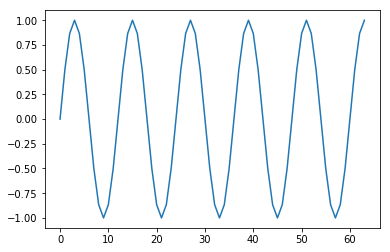

In [94]:
aaa=np.sin(np.arange(64)*np.pi*1/6)
plt.plot(aaa)

In [3]:
def cutTo8(cbcr):
    for cutx in range(cbcr.shape[0]//8):
        for cuty in range(cbcr.shape[1]//8):
            cbcrResize=cbcr[cutx*8:cutx*8+8,cuty*8:cuty*8+8]#.copy()
            
            yield cbcrResize,cutx*8,cuty*8
#             break

In [4]:
cutTo8(cbcr)

<generator object cutTo8 at 0x7fed90f4ae50>

In [38]:
jpg=arrayOri.copy()
# for que in range(cbcr.shape[0]//8*cbcr.shape[1]//8):
for fig1,nx,ny in cutTo8(cbcr):
    # DCT
    Gy,Gcb,Gcr=map(dct02,(fig1[:,:,0],fig1[:,:,1],fig1[:,:,2]))

    # Quantization
    By=Qy(Gy)
    Bcb=Qc(Gcb)
    Bcr=Qc(Gcr)
    Bs=np.stack([By.reshape(-1),Bcb.reshape(-1),Bcr.reshape(-1)],-1)
    # DCT
    Gy,Gcb,Gcr=map(dct02,(fig1[:,:,0],fig1[:,:,1],fig1[:,:,2]))

    # Quantization
    By=Qy(Gy)
    Bcb=Qc(Gcb)
    Bcr=Qc(Gcr)
    Bs=np.stack([By.reshape(-1),Bcb.reshape(-1),Bcr.reshape(-1)],-1)
    # iQuantization
    iGy=iQy(By)
    iGcb,iGcr= iQc(Bcb),iQc(Bcr)

    # iDCT
    iY,iCb,iCr=map(idct02,(iGy,iGcb,iGcr))
    # iRGB
    jpg[nx:nx+8,ny:ny+8]=rgb(np.stack([iY,iCb,iCr],2))

In [63]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')


<Figure size 432x288 with 0 Axes>

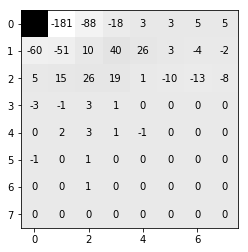

In [97]:
fig, ax = plt.subplots()
ax.imshow(-Gy,"gray")
for i in range(8):
    for j in range(8):
        c = Gy[j,i]
        ax.text(i, j, int(c), va='center', ha='center')

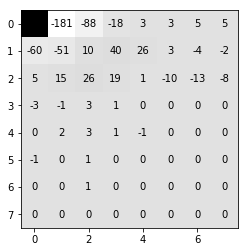

In [98]:
fig, ax = plt.subplots()
ax.imshow(-By,"gray")
for i in range(8):
    for j in range(8):
        c = Gy[j,i]
        ax.text(i, j, int(c), va='center', ha='center')

In [70]:
# plt.imsave('JPG0.png', arrayOri)

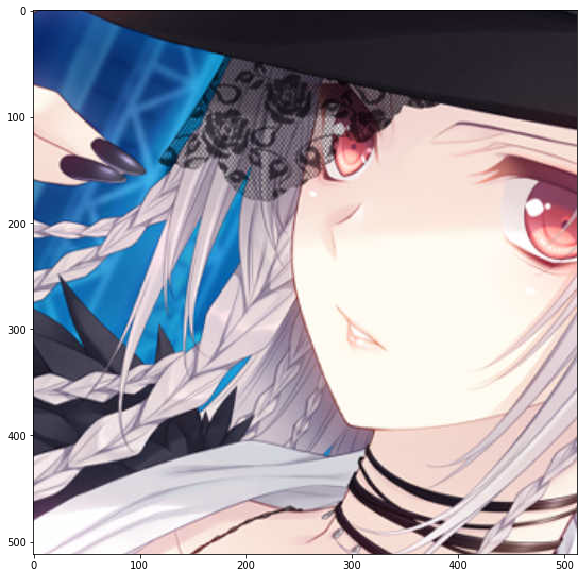

In [102]:
plt.figure(figsize=(10,10))
plt.imshow(jpg)
# plt.imsave('iJPG0.jpg', jpg)

In [ ]:
ax[1,0].imshow(cbcr[:,:,1],"gray")

In [12]:

fig1=cutTo8(cbcr)
fig1[:,:,0].shape

(8, 8)

In [16]:
# DCT
Gy,Gcb,Gcr=map(dct02,(fig1[:,:,0],fig1[:,:,1],fig1[:,:,2]))

# Quantization
By=Qy(Gy)
Bcb=Qc(Gcb)
Bcr=Qc(Gcr)
Bs=np.stack([By.reshape(-1),Bcb.reshape(-1),Bcr.reshape(-1)],-1)

In [39]:
# iQuantization
iGy=iQy(By)
iGcb,iGcr= iQc(Bcb),iQc(Bcr)

# iDCT
iY,iCb,iCr=map(idct02,(iGy,iGcb,iGcr))

In [40]:
# iRGB
ifig1=rgb(np.stack([iY,iCb,iCr],2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


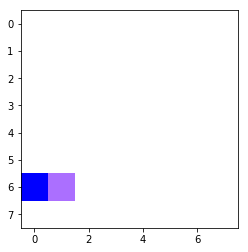

In [41]:
plt.imshow(ifig1,"gray")

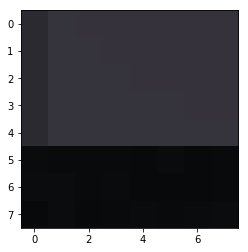

In [42]:
plt.imshow(cutTo8(arrayOri),"gray")

In [47]:
cutTo8(arrayOri)[5],ifig1[5]

(array([[10, 11, 13],
        [ 9, 10, 12],
        [ 9, 10, 12],
        [ 9, 10, 12],
        [ 8,  9, 11],
        [10, 11, 13],
        [ 8,  9, 11],
        [ 9, 10, 12]], dtype=uint8),
 array([[16.4834008 , 16.2509458 , 23.8294008 ],
        [17.73046022, 17.49800522, 25.07646022],
        [19.61994885, 19.38749385, 26.96594885],
        [21.27762636, 21.04517136, 28.62362636],
        [22.03634965, 21.80389465, 29.38234965],
        [21.78060999, 21.54815499, 29.12660999],
        [20.96411812, 20.73166312, 28.31011812],
        [20.29776038, 20.06530538, 27.64376038]]))

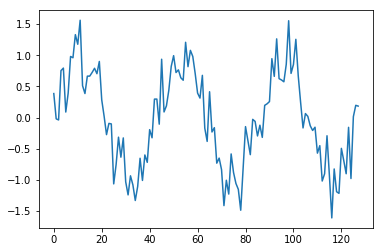

In [22]:
N=128
x = np.arange(N)
y2 = np.sin(6*x/N*np.pi)+np.random.randn(N)*0.3#np.cos(x)-np.sin(3*x)
    
plt.plot(y2)
plt.show()

In [23]:
# plt.plot(np.abs(dft(y2)))
# plt.plot(idft(y2))
# plt.plot(dct0(y2))
# plt.plot(dct0_dft(y2))
plt.plot(fct(y2))
# plt.plot(idct0(dct0(y2)))
# plt.plot(dct0_fft(dct0_fft(y2)))
plt.plot(dct(y2,axis=0, norm='ortho' ))
# plt.plot(y2)
# plt.plot(np.abs(fft(y2)))
# plt.plot(ifft((fft(y2))))

NameError: name 'fct' is not defined

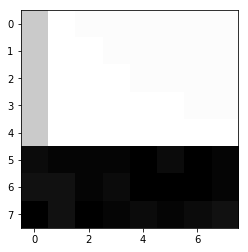

In [389]:
plt.imshow(fig1[:,:,0], 'gray')

In [601]:
from scipy.fftpack import dct, idct

# set_printoptions(linewidth=200, precision=1, suppress=True)

def dct2(a):
    return dct( dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return idct( idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [13]:
Zs=Bs[Zigzag(8)]

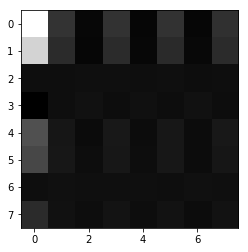

In [24]:
# log_shift_dct_img=np.log(1+np.abs(dct2(fig1[:,:,0])))
# dct_img=np.log(1+np.abs(dct2(fig1[:,:,0])))
# plt.imshow(dct_img, 'gray')
Gy=
plt.imshow(dct2(fig1[:,:,0]).real, 'gray')
# plt.imshow(np.abs(dct2(cbcr[:512,:512,0])[:10,:10]), 'gray')